# INTRODUCTION
1. Import required libraries
1. Read datas
1. Overall of each nationality
1. Most common 25 Surname of Turkish Footballers
1. Overall of each position for Turkish Footballer
1. Potential of each position for Turkish Footballer
1. Overall vs Potential of each Position
1. Pie Chart for Preferred Foot
<br>
<br>
Plot Contents:
* [Bar Plot](#1)
* [Point Plot](#2)
* [Joint Plot](#3)
* [Pie Chart](#4)
* [Lm Plot](#5)
* [Kde Plot](#6)
* [Violin Plot](#7)
* [Heatmap](#8)
* [Box Plot](#9)
* [Swarm Plot](#10)
* [Pair Plot](#11)
* [Count Plot](#12)

In [1]:
# Import required libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa19/data.csv


In [2]:
# Read datas
data = pd.read_csv('/kaggle/input/fifa19/data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
data.Nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Spain', 'Belgium', 'Croatia',
       'Uruguay', 'Slovenia', 'Poland', 'Germany', 'France', 'England',
       'Italy', 'Egypt', 'Colombia', 'Denmark', 'Gabon', 'Wales',
       'Senegal', 'Costa Rica', 'Slovakia', 'Netherlands',
       'Bosnia Herzegovina', 'Morocco', 'Serbia', 'Algeria', 'Austria',
       'Greece', 'Chile', 'Sweden', 'Korea Republic', 'Finland', 'Guinea',
       'Montenegro', 'Armenia', 'Switzerland', 'Norway', 'Czech Republic',
       'Scotland', 'Ghana', 'Central African Rep.', 'DR Congo',
       'Ivory Coast', 'Russia', 'Ukraine', 'Iceland', 'Mexico', 'Jamaica',
       'Albania', 'Venezuela', 'Japan', 'Turkey', 'Ecuador', 'Paraguay',
       'Mali', 'Nigeria', 'Cameroon', 'Dominican Republic', 'Israel',
       'Kenya', 'Hungary', 'Republic of Ireland', 'Romania',
       'United States', 'Cape Verde', 'Australia', 'Peru', 'Togo',
       'Syria', 'Zimbabwe', 'Angola', 'Burkina Faso', 'Iran', 'Estonia',
       'Tunisia', 'Equato

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [6]:
data.Club.unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

In [7]:
data.Nationality.value_counts()

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
               ... 
Ethiopia          1
Puerto Rico       1
Malta             1
Fiji              1
Liberia           1
Name: Nationality, Length: 164, dtype: int64

<a id="1"></a> 
## Bar Plot

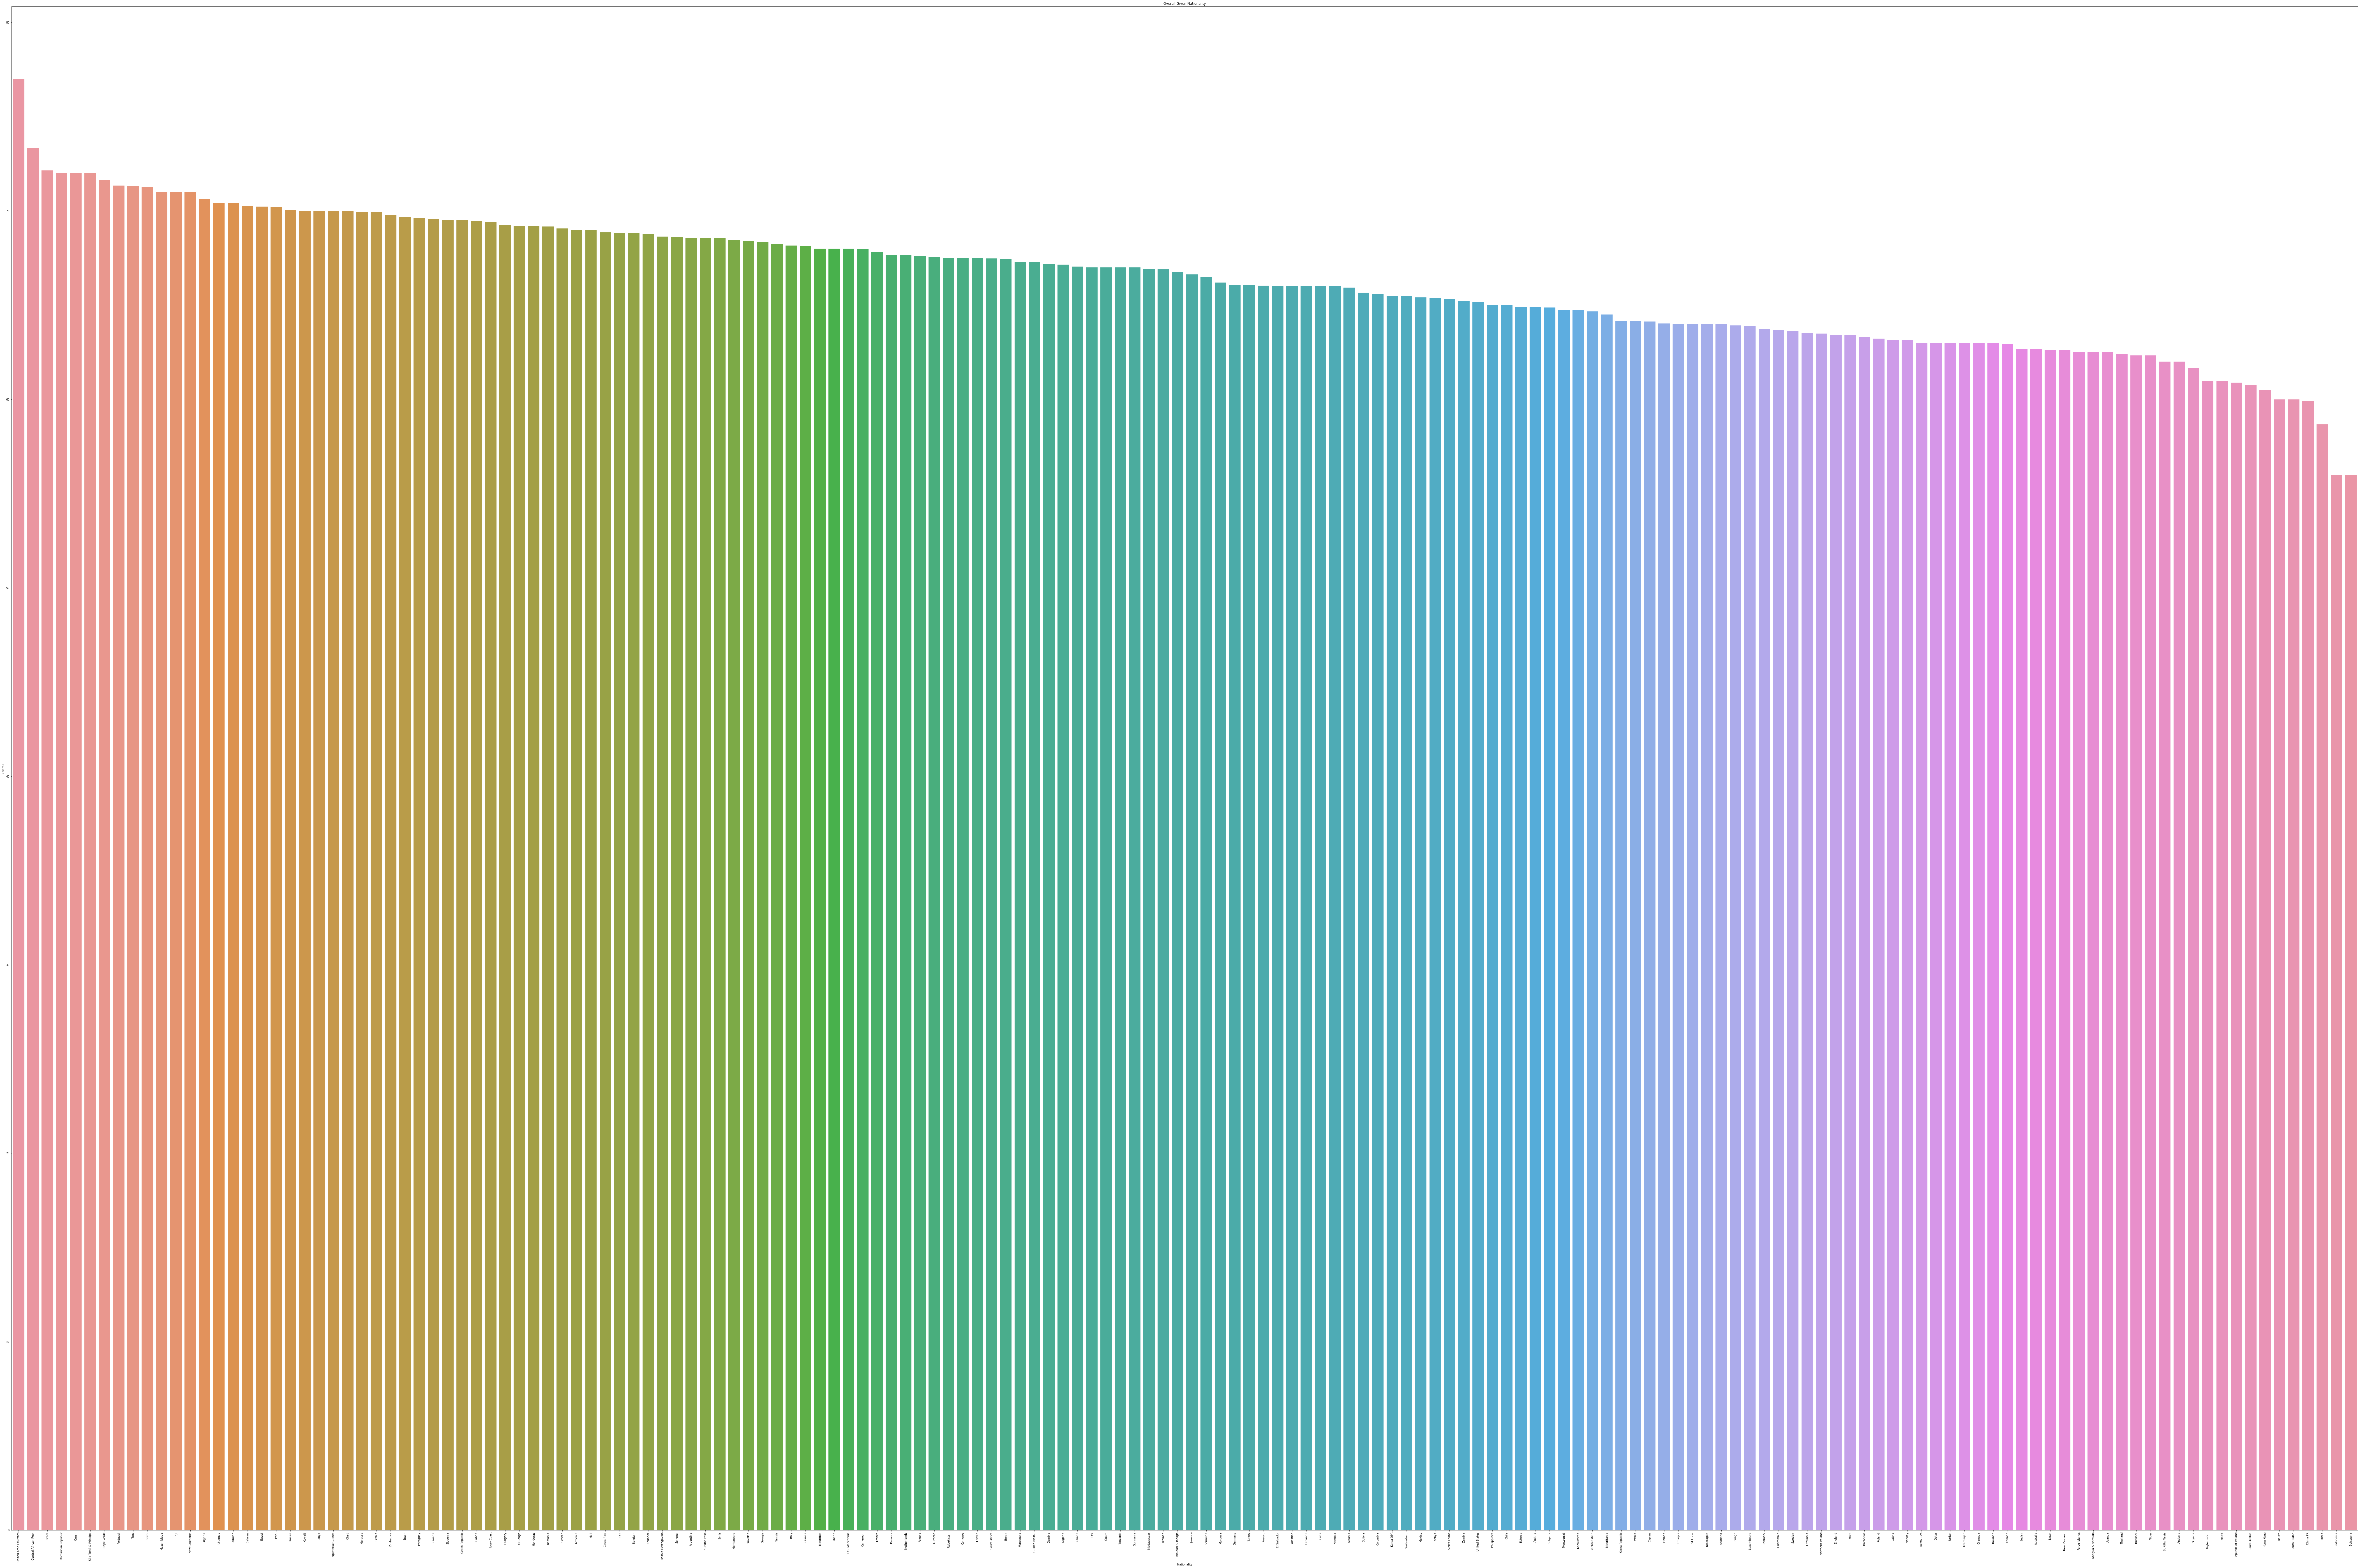

In [8]:
# Overall of each nationality
area_list = list(data['Nationality'].unique())
overall_ratio = []
for i in area_list:
    x = data[data['Nationality']==i]
    overall_rate = sum(x.Overall)/len(x)
    overall_ratio.append(overall_rate)
data = pd.DataFrame({'area_list': area_list,'overall_ratio':overall_ratio})
new_index = (data['overall_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(150,100))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['overall_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Nationality')
plt.ylabel('Overall')
plt.title('Overall Given Nationality')
plt.show()

In [9]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [10]:
#Let's Eye on Turkish Footballers
data1 = data[data['Nationality'] == "Turkey"][['Name','Overall','Potential','Position']]
data1

,Name,Overall,Potential,Position
383,O. Toprak,81,82,CB
449,H. Çalhanoğlu,80,84,CAM
659,C. Tosun,79,80,ST
705,N. Şahin,79,79,CDM
721,B. Yılmaz,79,79,ST
...,...,...,...,...
17581,S. Sarıkaya,53,72,CM
17759,M. Yıldız,52,61,GK
18046,K. Civelek,50,58,GK
18050,E. Destanoglu,50,74,GK


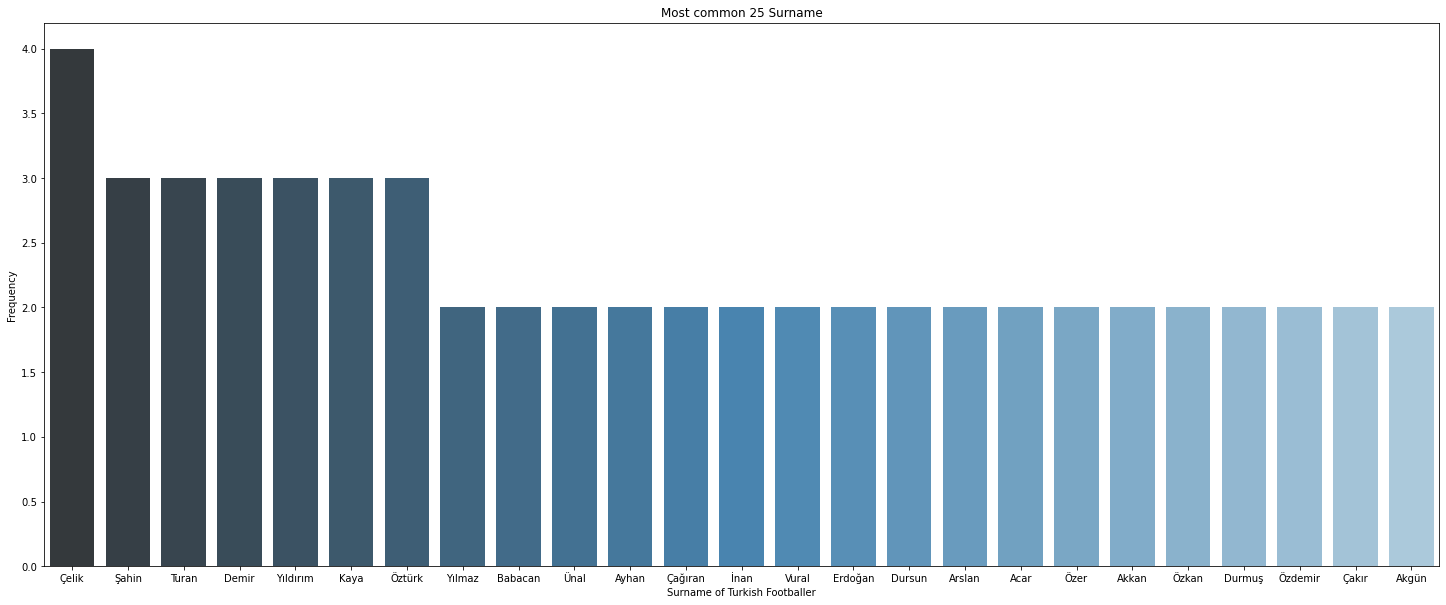

In [11]:
# Most common 25 Surname of Turkish Footballers
separate = data1.Name.str.split() 
a,b = zip(*separate)                    
name_list = b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(25)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)
# 
plt.figure(figsize=(25,10))
ax= sns.barplot(x=x, y=y,palette = "Blues_d")
plt.xlabel('Surname of Turkish Footballer')
plt.ylabel('Frequency')
plt.title('Most common 25 Surname')
plt.show()

In [12]:
data1.head()

,Name,Overall,Potential,Position
383,O. Toprak,81,82,CB
449,H. Çalhanoğlu,80,84,CAM
659,C. Tosun,79,80,ST
705,N. Şahin,79,79,CDM
721,B. Yılmaz,79,79,ST


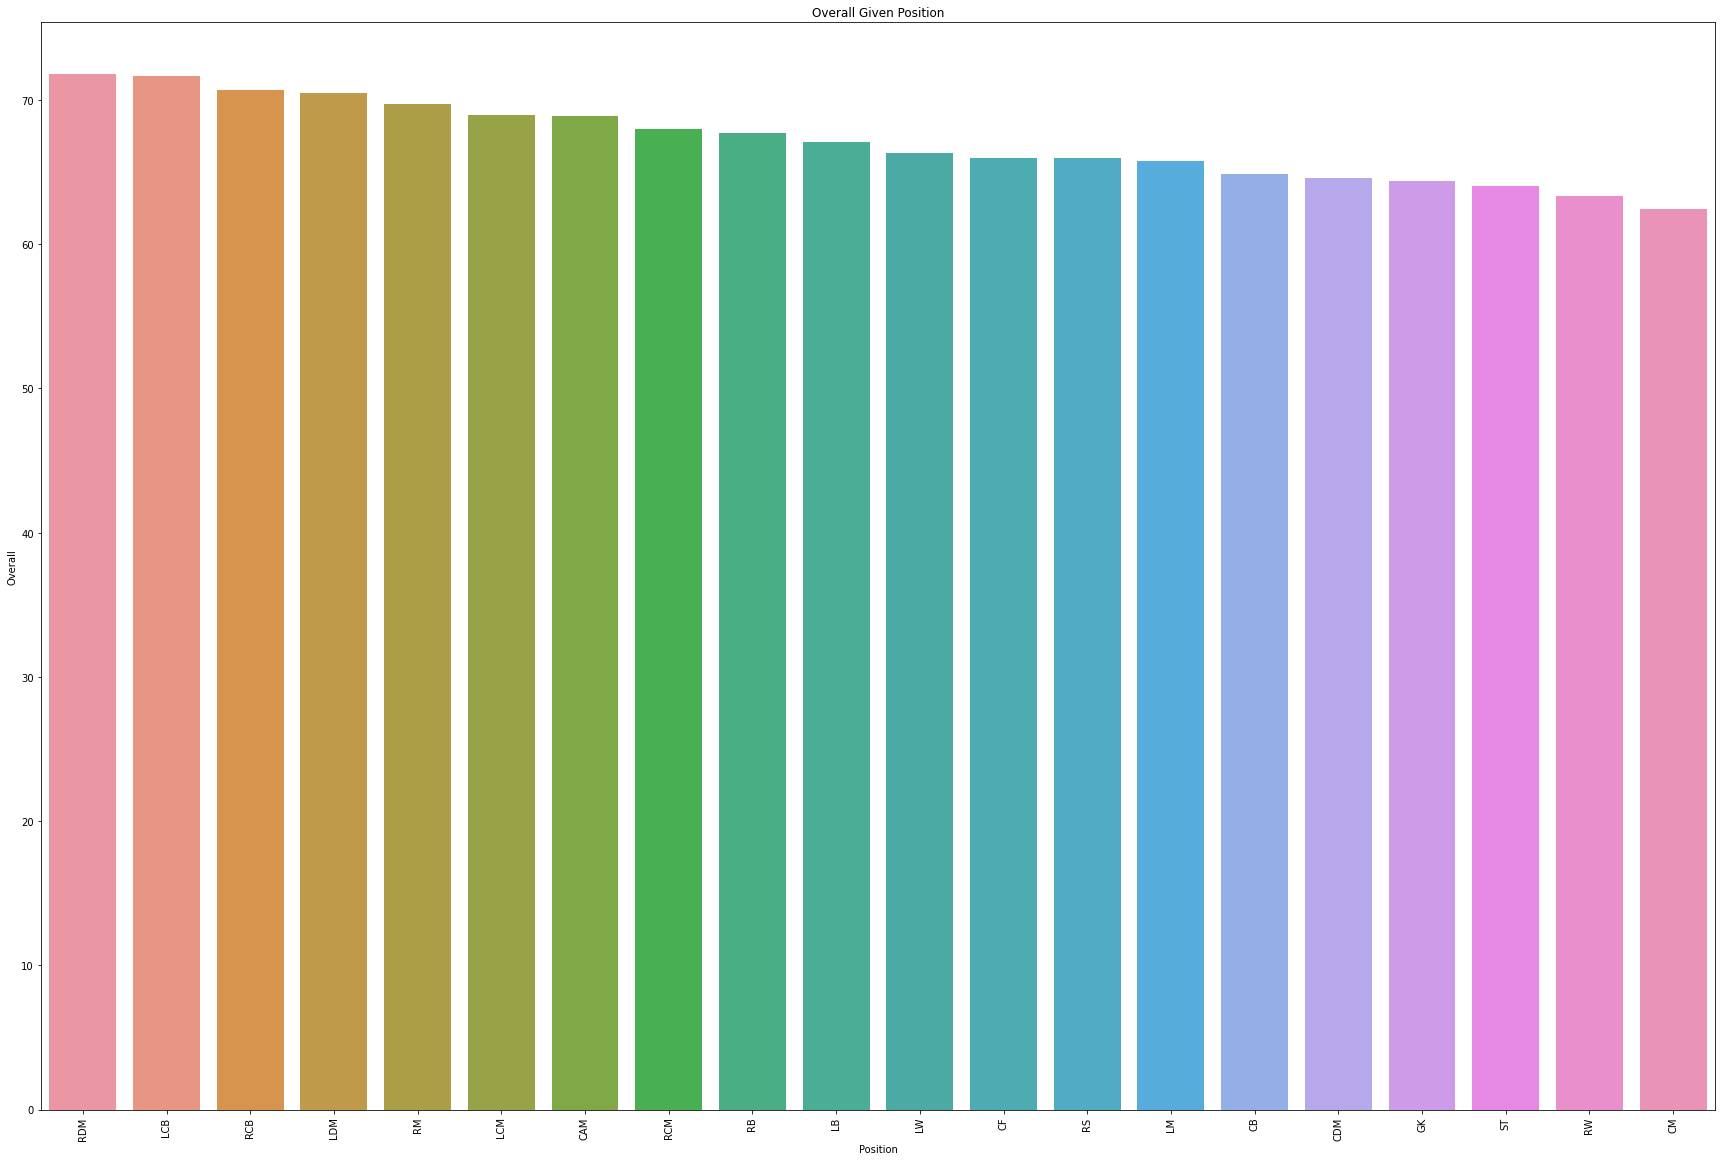

In [13]:
# Overall of each position
area_list = list(data1['Position'].unique())
overall_ratio = []
for i in area_list:
    x = data1[data1['Position']==i]
    overall_rate = sum(x.Overall)/len(x)
    overall_ratio.append(overall_rate)
data = pd.DataFrame({'area_list': area_list,'overall_ratio':overall_ratio})
new_index = (data['overall_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(30,20))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['overall_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('Position')
plt.ylabel('Overall')
plt.title('Overall Given Position')
plt.show()

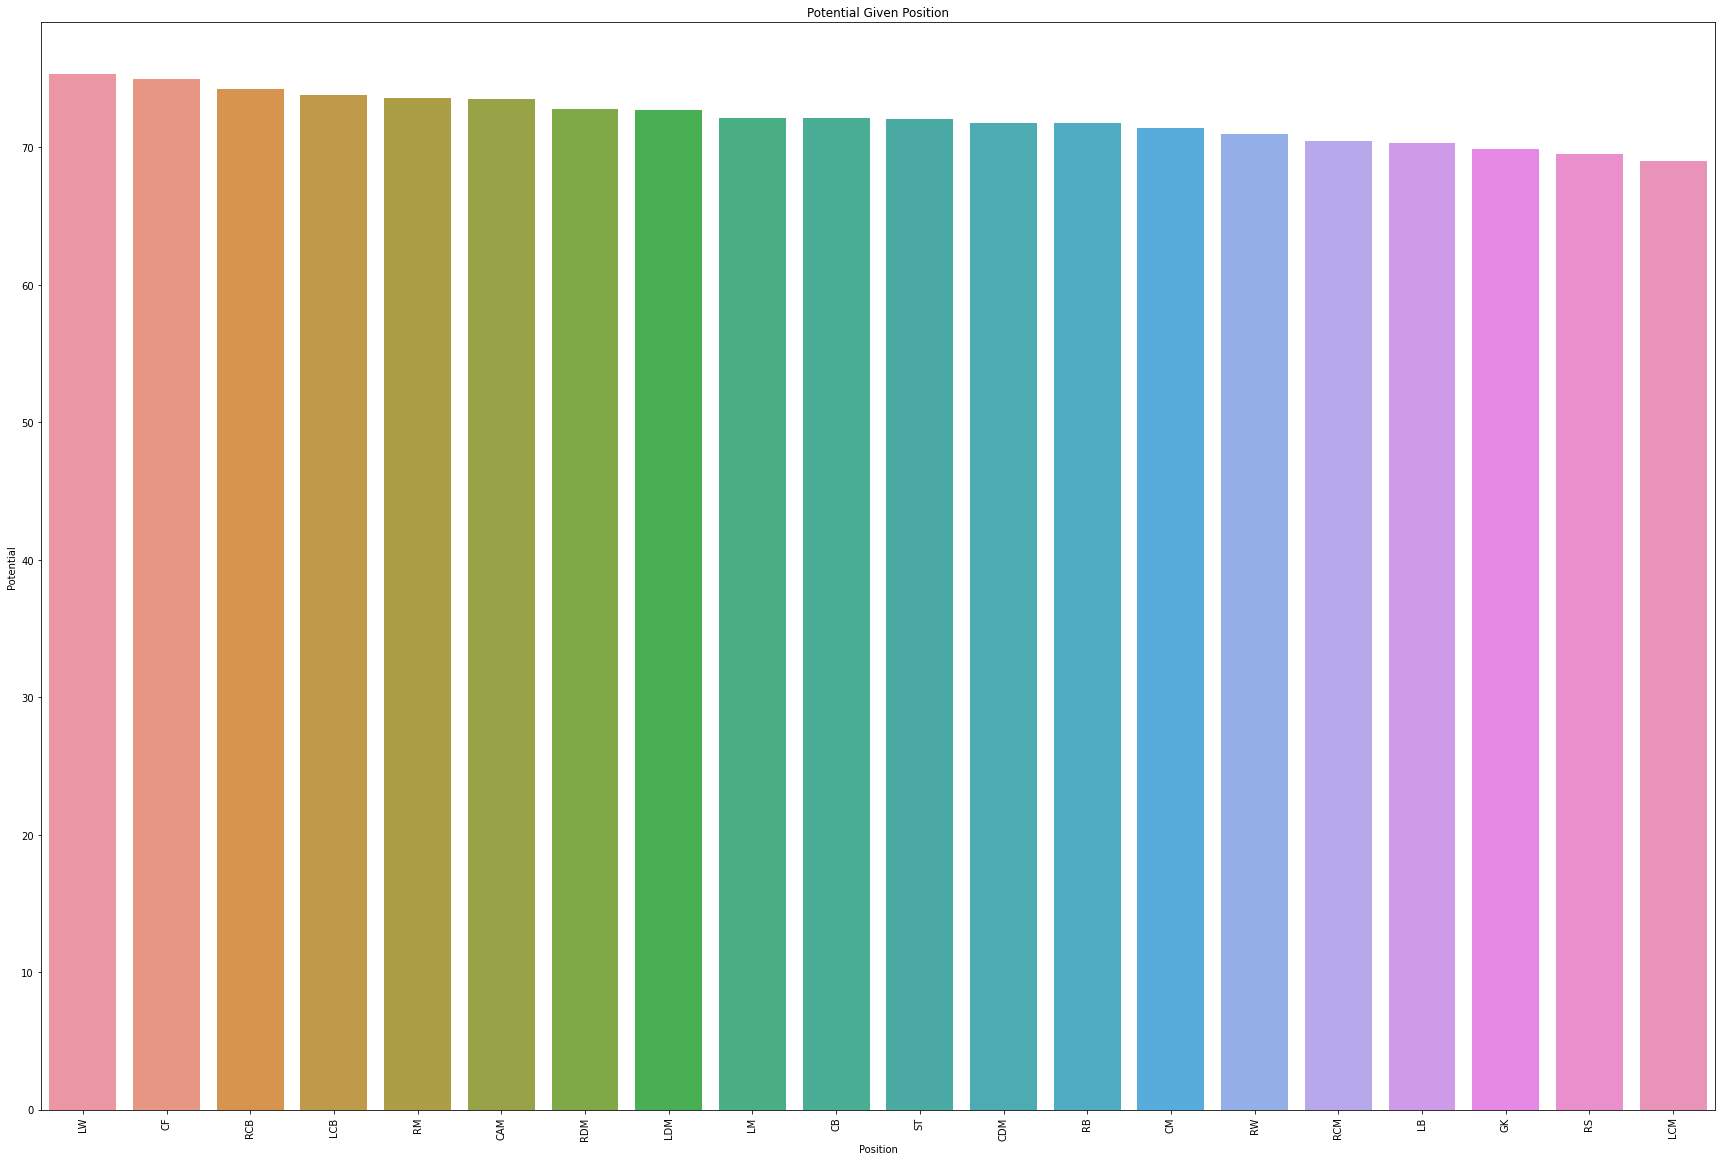

In [14]:
# Potential of each position
area_list = list(data1['Position'].unique())
potential = []
for i in area_list:
    x = data1[data1['Position']==i]
    potential_rate = sum(x.Potential)/len(x)
    potential.append(potential_rate)
data = pd.DataFrame({'area_list': area_list,'potential': potential})
new_index = (data['potential'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

# visualization
plt.figure(figsize=(30,20))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['potential'])
plt.xticks(rotation= 90)
plt.xlabel('Position')
plt.ylabel('Potential')
plt.title('Potential Given Position')
plt.show()

<a id="2"></a> 
## Point Plot

In [15]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


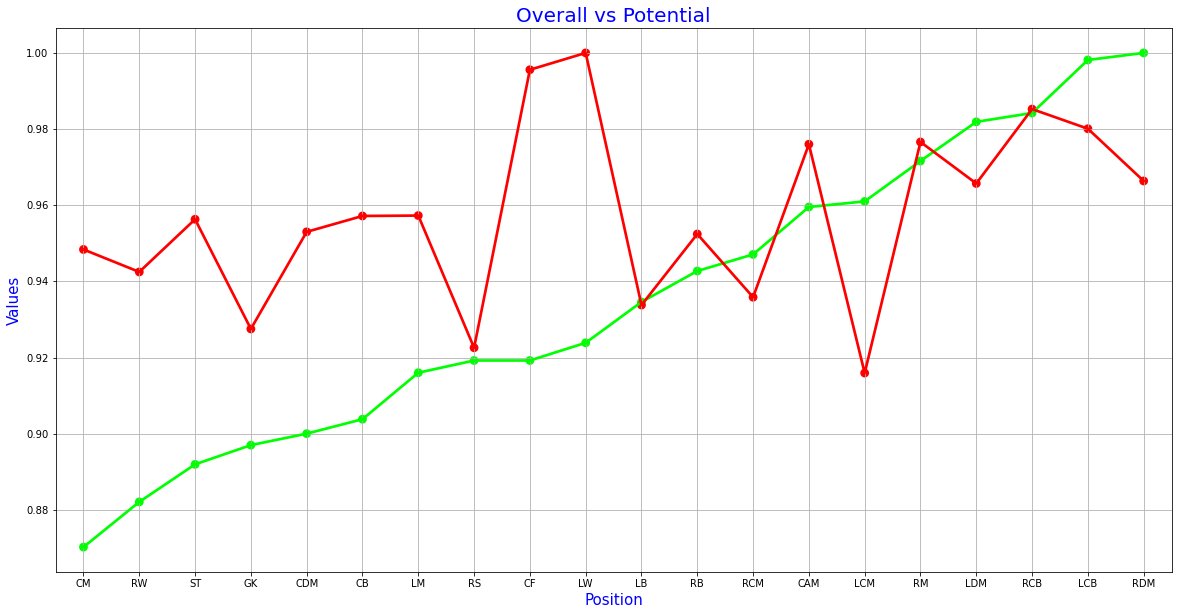

In [16]:
# Overall vs Potential of each Position
sorted_data['overall_ratio'] = sorted_data['overall_ratio']/max(sorted_data['overall_ratio'])
sorted_data2['potential'] = sorted_data2['potential']/max(sorted_data2['potential'])
turkey_data = pd.concat([sorted_data,sorted_data2['potential']],axis=1)
turkey_data.sort_values('overall_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='overall_ratio',data=turkey_data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='potential',data=turkey_data,color='red',alpha=0.8)
plt.xlabel('Position',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Overall vs Potential',fontsize = 20,color='blue')
plt.grid()

In [17]:
turkey_data.head()

,area_list,overall_ratio,potential
4,CM,0.870216,0.948378
19,RW,0.882080,0.942478
2,ST,0.891945,0.956305
6,GK,0.896995,0.927509
3,CDM,0.900010,0.953006


<a id="3"></a> 
## Joint Plot

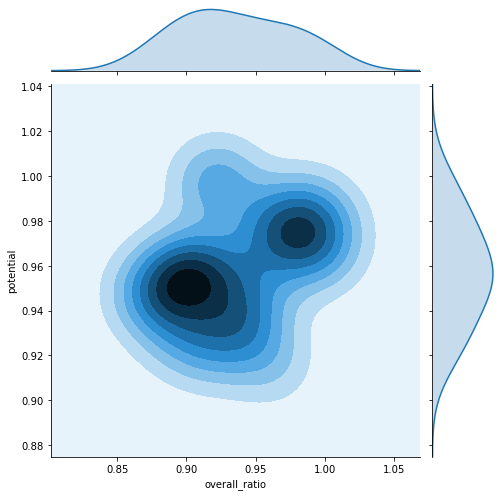

In [18]:
# Visualization of potential vs overall of each position with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
g = sns.jointplot(turkey_data.overall_ratio, turkey_data.potential, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

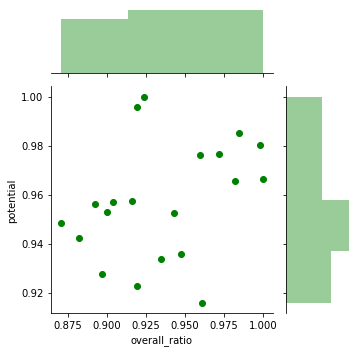

In [19]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("overall_ratio", "potential", data=turkey_data,size=5, ratio=3, color="g")

<a id="4"></a> 
## Pie Chart

In [20]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv')
data["Preferred Foot"].head()

0     Left
1    Right
2    Right
3    Right
4    Right
Name: Preferred Foot, dtype: object

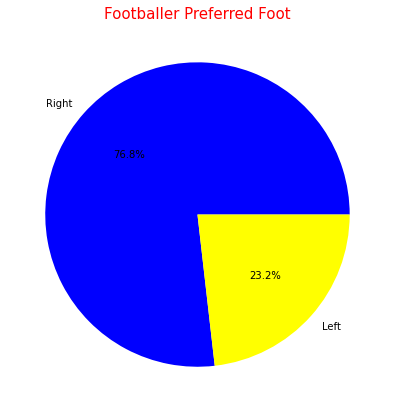

In [21]:
data["Preferred Foot"].dropna(inplace = True)
labels = data["Preferred Foot"].value_counts().index
colors = ['blue','yellow']
explode = [0,0]
sizes =data["Preferred Foot"].value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Footballer Preferred Foot',color = 'red',fontsize = 15)
plt.show()

<a id="5"></a> 
## Lm Plot

In [22]:
turkey_data.head()

,area_list,overall_ratio,potential
4,CM,0.870216,0.948378
19,RW,0.882080,0.942478
2,ST,0.891945,0.956305
6,GK,0.896995,0.927509
3,CDM,0.900010,0.953006


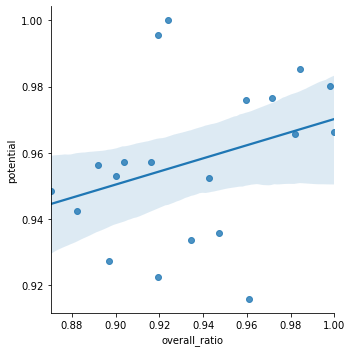

In [23]:
# Visualization of Overall vs Potential of every position with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
sns.lmplot(x="overall_ratio", y="potential", data=turkey_data)
plt.show()

<a id="6"></a> 
## Kde Plot

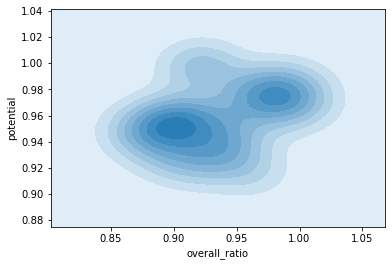

In [24]:
# Visualization with different style of seaborn code
# cubehelix plot
sns.kdeplot(turkey_data.overall_ratio, turkey_data.potential, shade=True, cut=3)
plt.show()

<a id="7"></a> 
## Violin Plot

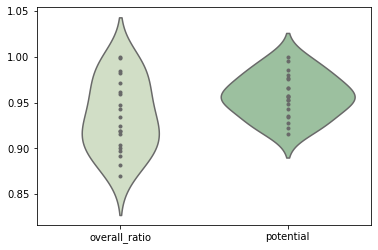

In [25]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
pal = sns.cubehelix_palette(2, rot=-.5, dark=.7)
sns.violinplot(data=turkey_data, palette=pal, inner="points")
plt.show()

<a id="8"></a> 
## Heatmap Plot

In [26]:
turkey_data.corr()

,overall_ratio,potential
overall_ratio,1.000000,0.327481
potential,0.327481,1.000000


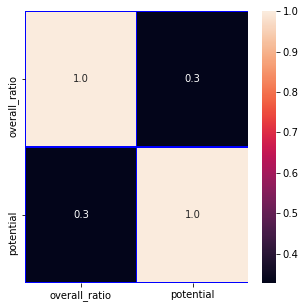

In [27]:
#correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(turkey_data.corr(), annot=True, linewidths=0.5,linecolor="blue", fmt= '.1f',ax=ax)
plt.show()

<a id="9"></a> 
## Box Plot

In [28]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


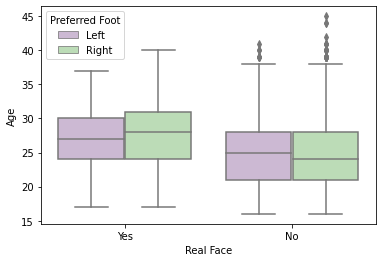

In [29]:
sns.boxplot(x="Real Face", y="Age", hue="Preferred Foot", data=data, palette="PRGn")
plt.show()

<a id="10"></a> 
## Swarm Plot

In [30]:
data = data.iloc[0:500,:]

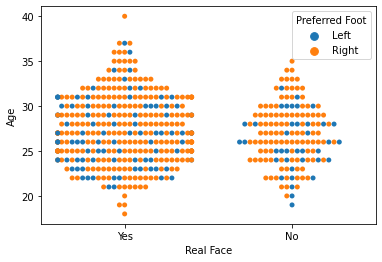

In [31]:
sns.swarmplot(x="Real Face", y="Age",hue="Preferred Foot", data=data)
plt.show()

<a id="11"></a> 
## Pair Plot

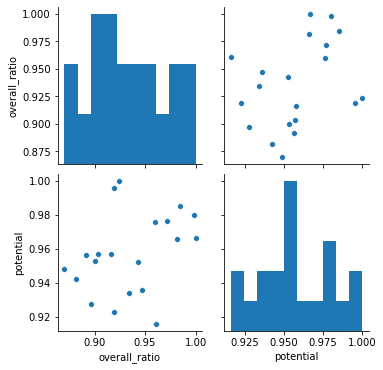

In [32]:
# pair plot
sns.pairplot(turkey_data)
plt.show()

<a id="12"></a> 
## Count Plot

In [33]:
data = pd.read_csv('/kaggle/input/fifa19/data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Text(0.5, 1.0, 'Foot')

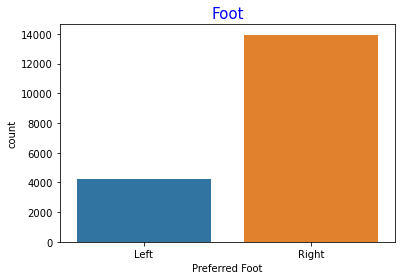

In [34]:
sns.countplot(data["Preferred Foot"])
plt.title("Foot",color = 'blue',fontsize=15)